# Fast Style Transfer
### 程式修改自[Fast Style Transfer for Arbitrary Styles](https://www.tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization)

## 載入相關套件

In [1]:
import functools
import os
from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

## 定義圖像裁切、載入、前置處理及顯示的函數

In [2]:
# 定義裁切圖像的函數
def crop_center(image):
  """Returns a cropped square image."""
  shape = image.shape
  new_shape = min(shape[1], shape[2])
  offset_y = max(shape[1] - shape[2], 0) // 2
  offset_x = max(shape[2] - shape[1], 0) // 2
  image = tf.image.crop_to_bounding_box(
      image, offset_y, offset_x, new_shape, new_shape)
  return image

# 定義載入圖像並進行前置處理的函數
@functools.lru_cache(maxsize=None)
def load_image(image_url, image_size=(256, 256), preserve_aspect_ratio=True):
  """Loads and preprocesses images."""
  # Cache image file locally.
  if image_url.startswith('http'):
      image_path = tf.keras.utils.get_file(os.path.basename(image_url)[-128:], image_url)
  else:
      image_path = image_url
  # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
  img = tf.io.decode_image(
      tf.io.read_file(image_path),
      channels=3, dtype=tf.float32)[tf.newaxis, ...]
  img = crop_center(img)
  img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
  return img

# 定義顯示圖像的函數
def show_n(images, titles=('',)):
  n = len(images)
  image_sizes = [image.shape[1] for image in images]
  w = (image_sizes[0] * 6) // 320
  plt.figure(figsize=(w * n, w))
  gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)
  for i in range(n):
    plt.subplot(gs[i])
    plt.imshow(images[i][0], aspect='equal')
    plt.axis('off')
    plt.title(titles[i] if len(titles) > i else '')
  plt.show()

## 下載圖像

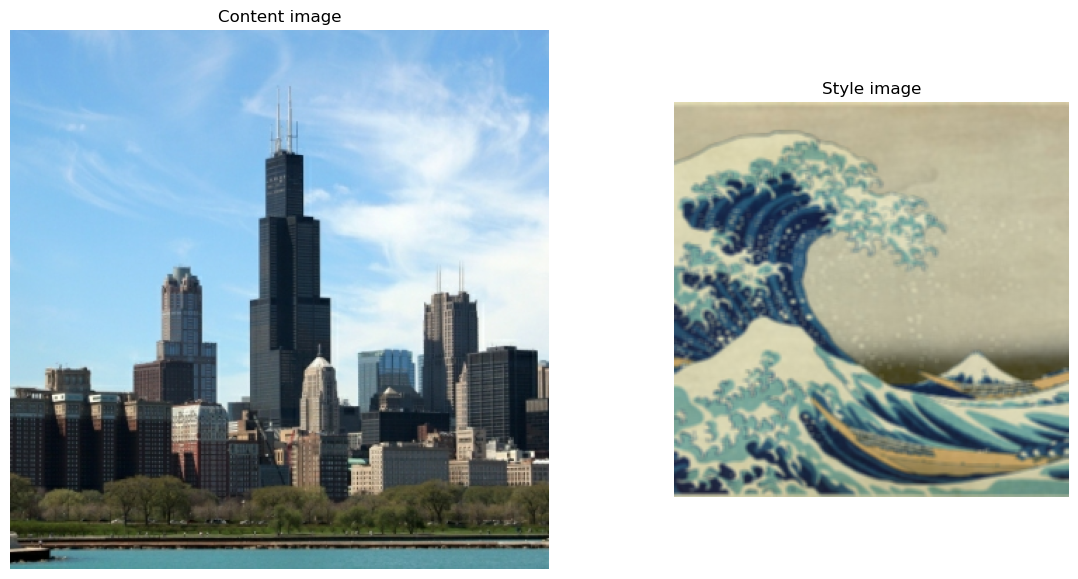

In [3]:
content_img_size = (384, 384)
style_img_size = (256, 256)  # Recommended to keep it at 256.
content_path = "../style_transfer/chicago.jpg"
style_path = "../style_transfer/wave.jpg"
content_image = load_image(content_path, content_img_size)
style_image = load_image(style_path, style_img_size)
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME')
show_n([content_image, style_image], ['Content image', 'Style image'])

## 自 TensorFlow Hub 下載壓縮的模型

In [4]:
hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)

## 生成圖像

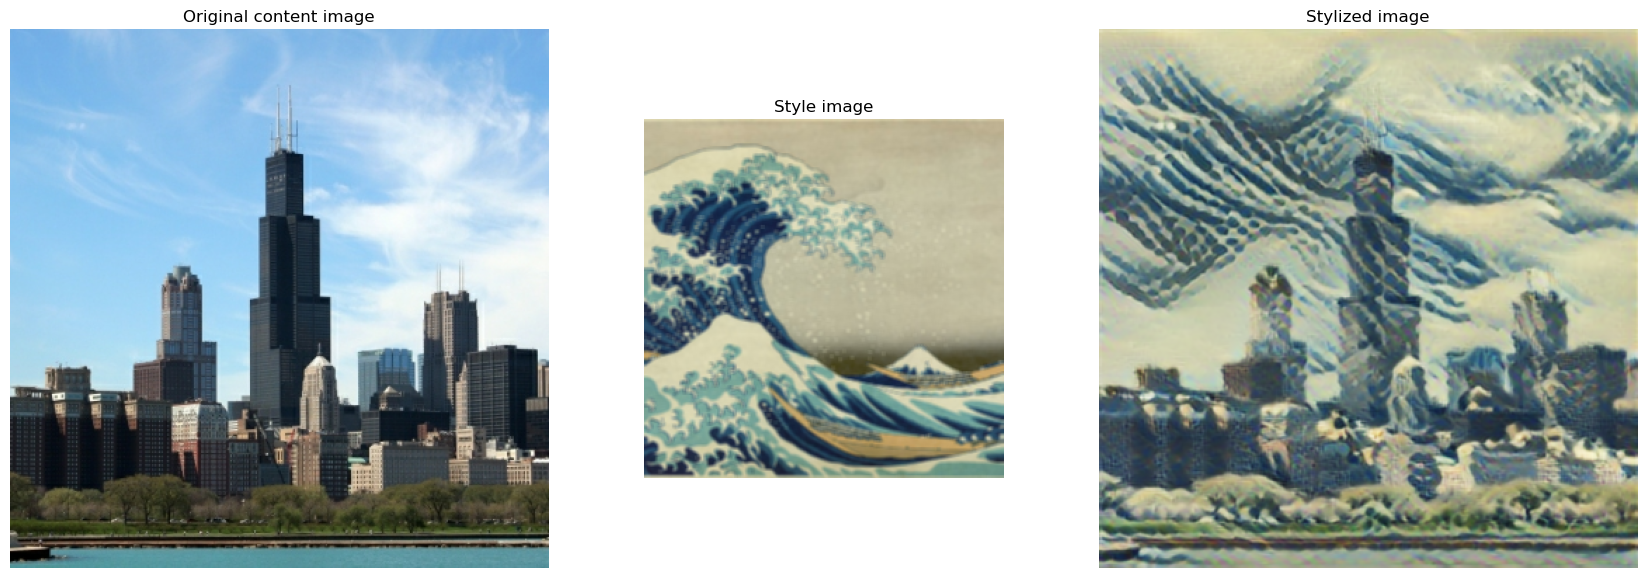

In [5]:
outputs = hub_module(content_image, style_image)
stylized_image = outputs[0]
show_n([content_image, style_image, stylized_image], 
       titles=['Original content image', 'Style image', 'Stylized image'])

## 以另一張圖測試

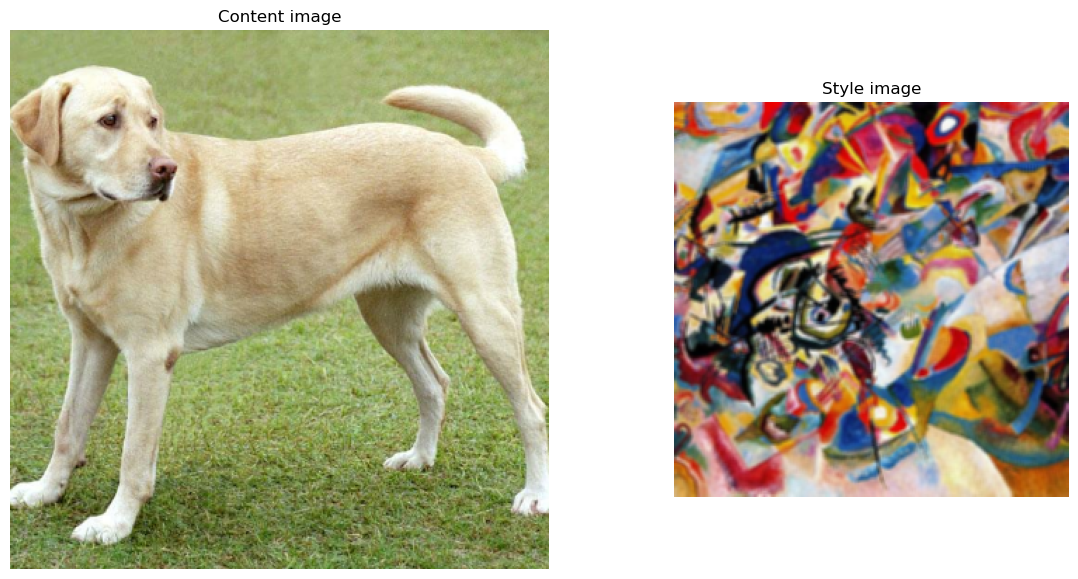

In [6]:
storage_url = 'https://storage.googleapis.com/download.tensorflow.org/'
content_url = storage_url + 'example_images/YellowLabradorLooking_new.jpg'
style_url = storage_url + 'example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg'
content_image = load_image(content_url, content_img_size)
style_image = load_image(style_url, style_img_size)
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME')
show_n([content_image, style_image], ['Content image', 'Style image'])

## 生成圖像

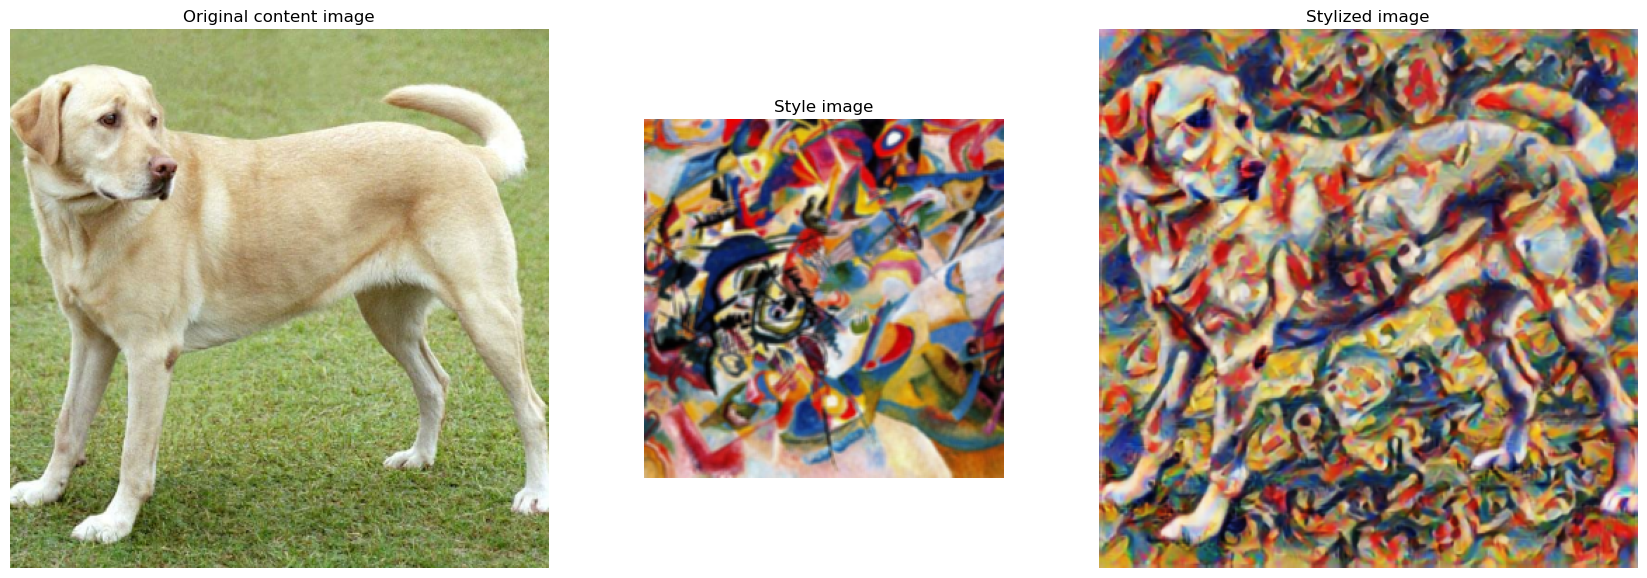

In [7]:
outputs = hub_module(content_image, style_image)
stylized_image = outputs[0]
show_n([content_image, style_image, stylized_image], 
       titles=['Original content image', 'Style image', 'Stylized image'])